In [1]:
%matplotlib inline

## Mobility Pattern Analysis

##### Laurent l. Santos
###### Department of Civil, Environmental and Geomatic Engineering
###### University College London| UCL

This study aims to study the mobility pattern analysis at the individual level of users from Gowalla, an online geo-social network.

#### Part I - Acessing the Dataset and Visualising Check-in Locations 

In [2]:
# import the required libraries

import folium
import folium.plugins
from folium import FeatureGroup, LayerControl, Map, Marker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',size=10)

In [3]:
# access the dataset
df=pd.read_csv('Cambridge_gowalla.csv')

In [4]:
# draw in matplotlib a scatterplot using the longitude and latitude for users 75027 and 102829
# create a dataframa for location coordinates and users
lon=df['lon']
lat=df['lat']

df1=df[df['User_ID']==75027]
df2=df[df['User_ID']==102829]

In [5]:
# we can analyse the content of the DataFrame using describe
df1.describe()

,ID,User_ID,lon,lat,loc_ID
count,67.000000,67.0,67.000000,67.000000,67.000000
mean,1221.000000,75027.0,0.143344,52.203252,368952.552239
std,19.485037,0.0,0.009057,0.009393,123857.771353
min,1188.000000,75027.0,0.122806,52.157223,31328.000000
25%,1204.500000,75027.0,0.141966,52.195771,373382.000000
50%,1221.000000,75027.0,0.144424,52.205200,374196.000000
75%,1237.500000,75027.0,0.146594,52.209822,395408.000000
max,1254.000000,75027.0,0.174108,52.222927,758004.000000


In [6]:
df2.describe()

,ID,User_ID,lon,lat,loc_ID
count,75.000000,75.0,75.000000,75.000000,7.500000e+01
mean,1393.000000,102829.0,0.104032,52.206477,5.333699e+05
std,21.794495,0.0,0.015007,0.007267,3.528933e+05
min,1356.000000,102829.0,0.090578,52.194001,2.135600e+04
25%,1374.500000,102829.0,0.094001,52.196678,3.739830e+05
50%,1393.000000,102829.0,0.094001,52.209531,3.739830e+05
75%,1411.500000,102829.0,0.110910,52.212543,9.630000e+05
max,1430.000000,102829.0,0.137495,52.212543,1.173370e+06


In tha dataset, user 75027 has less location data than user 102829 (67 and 75 respectedly).
To analyse the mobility trace of each user, we can set up a scatterplot with each data point based on the latitude and longitude coordinates.

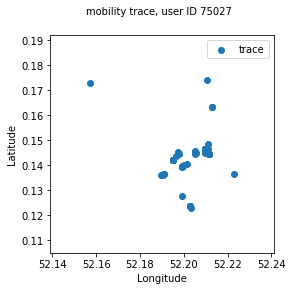

In [7]:
# we can then create a scatterplot of mobility trace from each user.
plt.figure(figsize=(4,4))
plt.scatter(df1.lat,df1.lon,label="trace")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle('mobility trace, user ID 75027',fontsize=10)
plt.legend()
plt.show()

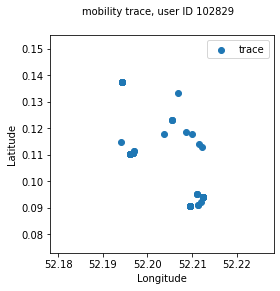

In [8]:
plt.figure(figsize=(4,4))
plt.scatter(df2.lat,df2.lon,label="trace")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle('mobility trace, user ID 102829',fontsize=10)
plt.legend()
plt.show()

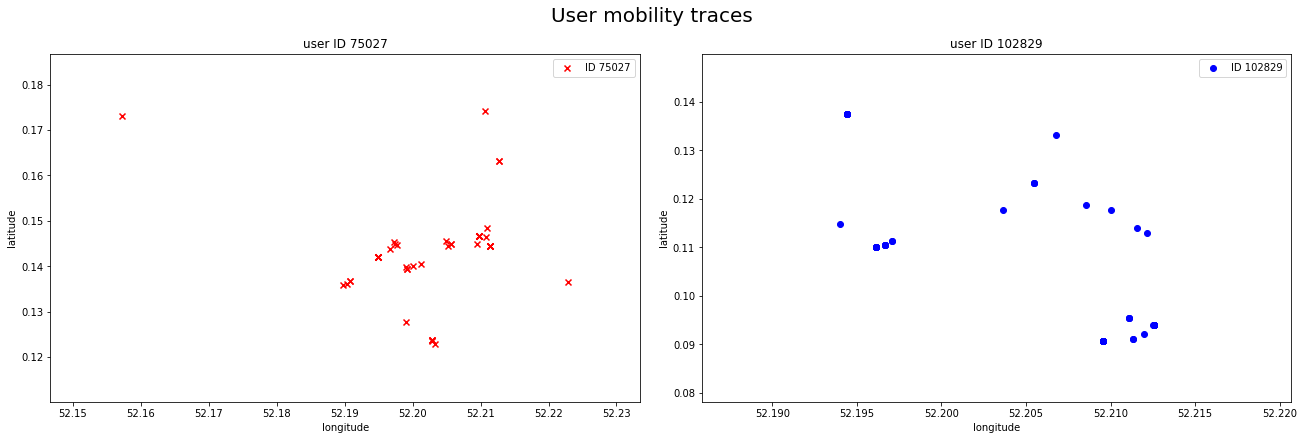

In [9]:
# to compare the mobility trace scattterplot, we can draw the two plots side-by-side to each other
fig,ax = plt.subplots(1,2,figsize=(18,6),constrained_layout=True)
ax[0].scatter(df1.lat,df1.lon,c='r',marker='x',label='ID 75027')
ax[1].scatter(df2.lat,df2.lon,c='b',marker='o',label='ID 102829')
ax[0].set_title('user ID 75027')
ax[0].set(xlabel='longitude',ylabel='latitude')
ax[0].legend()
ax[1].set_title('user ID 102829')
ax[1].legend()
ax[1].set(xlabel='longitude',ylabel='latitude')
fig.set_tight_layout
fig.suptitle('User mobility traces',fontsize=20)
plt.show()

We can conclude from the two plots that user 102829 presents a more widespread location behavior than user 75027.

#### Mapping Point with Folium

From the dataframe, df1 and df2, we can create a map of each of their locations. Ideally, each of the counters will also be labeled with their name.

In [10]:
# we first create lists of data to be populated
id = []
name = []
latitude = []
longitude = []
region = []

In [11]:
lon=df['lon']
lat=df['lat']
user1=df[df['User_ID']==75027]
user2=df[df['User_ID']==102829]

# making a bool series 
date_frame1 = df["date"]=='30/01/2010'
date_frame2 = df["date"]=='11/05/2010'

# filtering the data by user and date
user_data1 = df [(df.date == '30/01/2010') & (df.User_ID ==75027)]
user_data2 = df [(df.date == '11/05/2010') & (df.User_ID ==102829)]

In [12]:
# we can check each data frame just created
user_data1.head(3)

,ID,User_ID,date,Time,lon,lat,loc_ID
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196


In [13]:
user_data2.head(3)

,ID,User_ID,date,Time,lon,lat,loc_ID
1395,1396,102829,11/05/2010,18:03:09,0.110528,52.196678,963000
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983


In [14]:
# we have then to creta a list for each user' s location to be plotted in Folium
locations_user1 = user_data1[['lat', 'lon']]
locationlist_user1 = locations_user1.values.tolist()

locations_user2 = user_data2[['lat', 'lon']]
locationlist_user2 = locations_user2.values.tolist()

points_user1 = locations_user1.values.tolist()
points_user2 = locations_user2.values.tolist()

In [15]:
# Import Map, Marker, Icon, Polyline from "folium" library. 
from folium import Map, Marker, Icon, PolyLine

# Create a map with the center as first point in the points list and set the zoom to 17 (you can change it)
my_map = Map(points_user1[0], zoom_start=13)

# Add markers for each point
for p in points_user1:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='red')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
        
        
for p in points_user2:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='blue')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
        
# Display the map
my_map

In [16]:
# we can join the geo- with lines by using PolyLine
# 'color' is used to set the line color.
# 'weight' is used to set the line width.
# 'opacity' is used to set the transparency of line.
my_map.add_child(PolyLine(points_user1, color='red', weight=2, opacity=2)) 
my_map.add_child(PolyLine(points_user2, color='blue', weight=2, opacity=2)) 
# Display the map
my_map

#### Part II - Network Analysis

In [17]:
# Import the required libraries

import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import LineString, Point
from IPython.display import IFrame
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__



'0.11'

In this section, we will use the package OSMnx to work with street networks: with data from OpenStreetMap.

In [18]:
# get the street network for Cambridge and the network type
G=ox.graph_from_place('Cambridge,UK',network_type='walk')

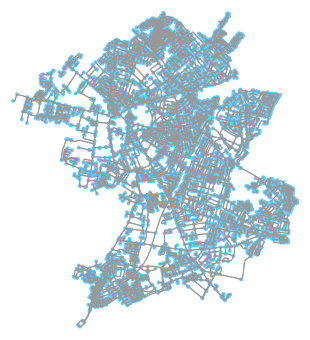

In [19]:
# project and plot the graph
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj)
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(G_proj, nodes=True, edges=True)

We now will provide the characterisation of the GC dataset for the each one of the user we are studying.  

In [20]:
# user 75027 on 30/01/2010 
# define origin/desination points then get the nodes nearest to each
origin_point_1 = (52.1572234, 0.173005367) 
destination_point_1 = (52.2028579, 0.123643417) 
origin_node_1 = ox.get_nearest_node(G, origin_point_1)
destination_node_1 = ox.get_nearest_node(G, destination_point_1)

# calculate the shortest path between origin and destination nodes
route1 = nx.shortest_path(G, origin_node_1, destination_node_1, weight='length')
str(route1)

'[554246, 4211887108, 5244989483, 5244989473, 554253, 5026732366, 1641667313, 623408208, 554257, 554259, 554262, 554263, 673845809, 25288585, 554283, 725608479, 554274, 482307301, 554267, 725608491, 1886890260, 5457750027, 554294, 8085920, 1486045382, 2225526102, 1486034654, 1486034699, 2225526091, 1486034710, 1486034675, 1486034731, 1486034690, 1486034683, 24670902, 1851353460, 14913680, 24673038, 672557749, 2341793821, 554296, 253911385, 36325153, 554297, 1610201020, 1479444535, 1479444522, 2197542100, 1479444515, 1479444520, 1244720067, 6572081, 21390893, 6572082, 21390892, 25285201, 25285200, 25285199, 21390891, 21524596, 21390890, 554299, 609064, 20922153, 20823619, 14959440, 20823587, 20823642, 1607081506]'

In [21]:
# user 102829 on 11/05/2010
# define origin/desination points then get the nodes nearest to each
origin_point_2 = (52.19611269, 0.110120773) 
destination_point_2 = (52.19667825, 0.110528469) 
origin_node_2 = ox.get_nearest_node(G, origin_point_2)
destination_node_2 = ox.get_nearest_node(G, destination_point_2)

# calculate the shortest path between origin and destination nodes
route2 = nx.shortest_path(G, origin_node_2, destination_node_2, weight='length')
str(route2)

'[20962781, 15431272]'

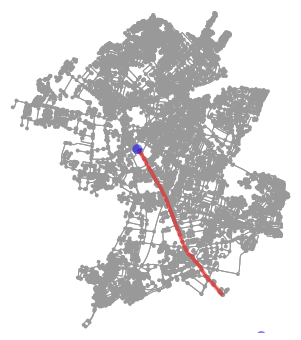

In [22]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route1, origin_point=origin_point_1, destination_point=destination_point_1)

We might plot each route with the shortest path on a graph of Cambridge.

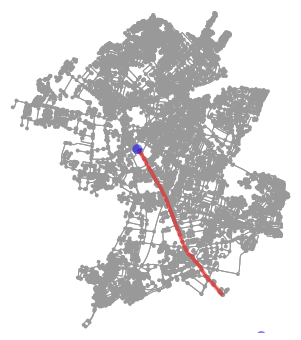

In [23]:
# plot the route showing origin/destination lat-long points in blue - user 75027 on 30/01/2010 
fig, ax = ox.plot_graph_route(G, route1, origin_point=origin_point_1, destination_point=destination_point_1)

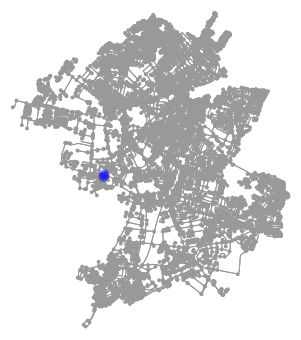

In [24]:
# plot the route showing origin/destination lat-long points in blue - user 102829 on 11/05/2010
fig, ax = ox.plot_graph_route(G, route2, origin_point=origin_point_2, destination_point=destination_point_2)

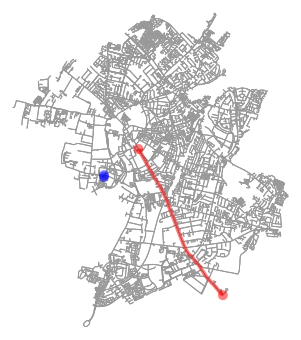

In [25]:
# we can also plot the two routes in the same graph - user 102829 in red and user 102829 in blue
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

ax = ox.plot_graph_routes(G, [route1, route2],route_color=rc, orig_dest_node_color=nc, node_size=0)

We can now calculate the lenght of each route.

In [26]:
# calculate the route in meters 
nx.shortest_path_length(G, origin_node_1, destination_node_1, weight='length')

4645.427999999999

In [27]:
nx.shortest_path_length(G, origin_node_2, destination_node_2, weight='length')

54.96

We can also calculate the lenght of each route as the crow flies.

In [28]:
# how far is it between these two nodes as the crow flies in meters (route 1)
ox.great_circle_vec(G.nodes[origin_node_1]['y'], G.nodes[origin_node_1]['x'],
                    G.nodes[destination_node_1]['y'], G.nodes[destination_node_1]['x'])

4583.086395856767

In [29]:
# how far is it between these two nodes as the crow flies in meters (route 2)
ox.great_circle_vec(G.nodes[origin_node_2]['y'], G.nodes[origin_node_2]['x'],
                    G.nodes[destination_node_2]['y'], G.nodes[destination_node_2]['x'])

54.959811381984224

Saving the route path node to a Dataframa.

In [30]:
# Get the nodes along the shortest path
route_nodes1 = nodes_proj.loc[route1]
#Convert to Panda Dataframe
pd_route1 = pd.DataFrame(data=route_nodes1)
user_data1.head(10)

,ID,User_ID,date,Time,lon,lat,loc_ID
1219,1220,75027,30/01/2010,22:14:11,0.123643,52.202858,473651
1220,1221,75027,30/01/2010,21:27:50,0.127612,52.198955,31328
1221,1222,75027,30/01/2010,17:20:55,0.144424,52.211325,374196
1222,1223,75027,30/01/2010,17:05:41,0.144786,52.209487,159331
1223,1224,75027,30/01/2010,16:59:45,0.146594,52.209822,373382
1224,1225,75027,30/01/2010,16:15:35,0.144826,52.205650,478191
1225,1226,75027,30/01/2010,16:06:57,0.144522,52.205200,478133
1226,1227,75027,30/01/2010,16:04:04,0.145606,52.204923,31968
1227,1228,75027,30/01/2010,15:13:43,0.173005,52.157223,477840


In [31]:
# Get the nodes along the shortest path
route_nodes2 = nodes_proj.loc[route2]
#Convert to Panda Dataframe
pd_route2 = pd.DataFrame(data=route_nodes2)
user_data2.head(10)

,ID,User_ID,date,Time,lon,lat,loc_ID
1395,1396,102829,11/05/2010,18:03:09,0.110528,52.196678,963000
1396,1397,102829,11/05/2010,10:57:10,0.095404,52.211119,1031743
1397,1398,102829,11/05/2010,07:24:49,0.094001,52.212543,373983
1398,1399,102829,11/05/2010,06:30:18,0.110121,52.196113,1024097


We can also create a LineString out of the Point geometries of the nodes:

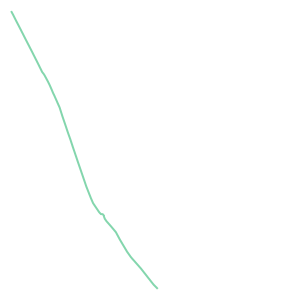

In [32]:
# Create a geometry for the shortest path (route 1)
route_line1 = LineString(list(route_nodes1.geometry.values))
route_line1

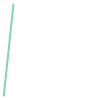

In [33]:
# Create a geometry for the shortest path (route 2)
route_line2 = LineString(list(route_nodes2.geometry.values))
route_line2